## DRUG CLASSIFICATION

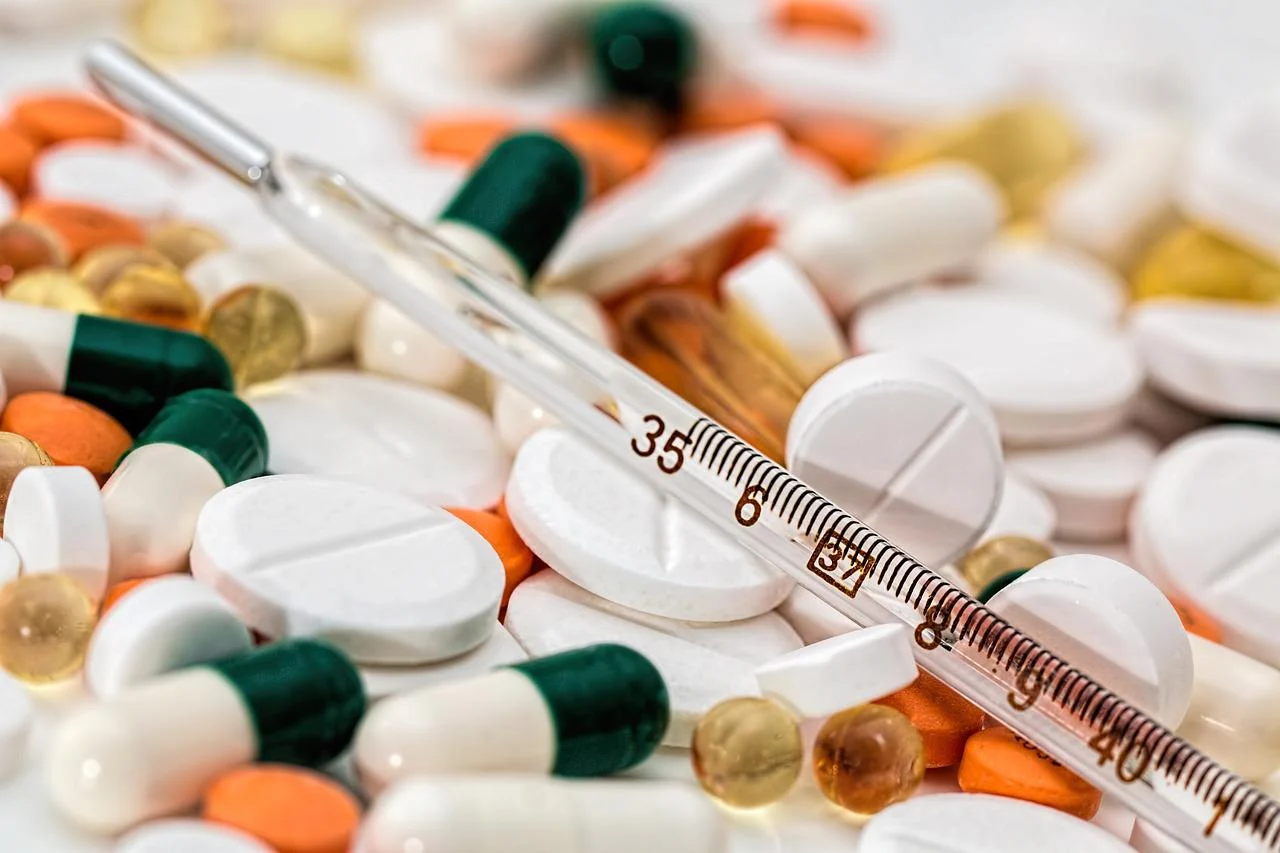

 
### Build a model to predict the outcome of the drugs that might be suitable for the patient.

- Prediction models help healthcare professionals and patients make clinical decisions. The goal of an accurate prediction model is to provide patient risk stratification to support  clinical decision-making with the hope of improving patient outcomes and quality of care.By using the drug dataset to build a model that predict the outcome of the drugs that might be accurate for the patient.


- Data set description:This data set contains Age,Gender,Cholestrol level,Bp level ,Drug taken,Na_to_K ratio as a cloumns(features) with 200 entries.


### Structure:
- Part 1 : Importing Libraries
- Part 2 : Reading and Preparing the dataset
- Part 3 : Exploring the data
- Part 4 : Cleaning the data
- Part 5 : Exracting the data
- Part 6 : Analysing and Visualization of the data
- Part 7 : Machine Learning Models Building
- Part 8 : Conclusion

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and Viewing the Dataset

In [2]:
d=pd.read_csv('drug200.csv')

In [3]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Exploring the data

### Information from the dataset

In [4]:
d.shape

(200, 6)

* In the given data set there are 200 entries with 6 columns

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* All the columns are filled with 200 entries

In [6]:
d.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
d.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Part 4: Cleaning the Dataset:
- Check the null values
- Check the duplicates


In [9]:
d.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

* No null values are present

In [10]:
d.duplicated().sum()

0

* No duplicated  values are present in the data set

### STATISTICAL INFORMATION

- showing the general statistics(mean,min,max,std) of integer type colums

In [11]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


- displaying the general stats for object type columns

In [12]:
d.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [13]:
d.max()

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugX
dtype: object

In [14]:
d.min()

Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           DrugY
dtype: object

###  Extracting dataset

#### To count number of categories

In [15]:
d['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

#### The distribution of cholesterol level is balanced.

In [17]:
d['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

#### The distribution of blood pressure level is balanced.

#### BP count according to average of ages

In [18]:
d.pivot_table('Age',columns='BP',aggfunc='mean')


BP,HIGH,LOW,NORMAL
Age,42.233766,47.03125,44.084746


* Low BP is for those on average 47 yeas old
* Normal BP is for those on average 44 yeas old
* High BP is for those on average 42 yeas old

#### Grouping according  to ages  which drugs is most used

In [19]:
n=d.groupby('Drug').Age.mean().sort_values(ascending=False)
n

Drug
drugB    62.500000
drugX    44.018519
DrugY    43.747253
drugC    42.500000
drugA    35.869565
Name: Age, dtype: float64

* Drug B is mostly taken by people whose average age group is 62
* Drug x is mostly taken by people whose average age group is 44
* Drug y is mostly taken by people whose average age group is 43
* Drug c is mostly taken by people whose average age group is 42
* Drug A is mostly taken by people whose average age group is 35


#### Cholesterol count according to average ages

In [20]:
n=d.groupby('Cholesterol').Age.mean().sort_values(ascending=False)
n

Cholesterol
HIGH      45.407767
NORMAL    43.154639
Name: Age, dtype: float64

* Low Cholesterol is for those on average 45 yeas old
* Normal Cholesterol is for those on average 43 yeas old


#### Count  of cholesterol and BP according to maximum age

In [21]:
d_Cholestrol_bp=pd.pivot_table(data=d[['Cholesterol','BP','Age']],
                            index=['Cholesterol','BP'],
                            values='Age',
                            aggfunc='max')
d_Cholestrol_bp

Age
Cholesterol BP         
HIGH        HIGH     74
            LOW      74
            NORMAL   73
NORMAL      HIGH     74
            LOW      74
            NORMAL   68

## DATA VISUALIZATION

Text(0.5, 1.0, 'count of bp')

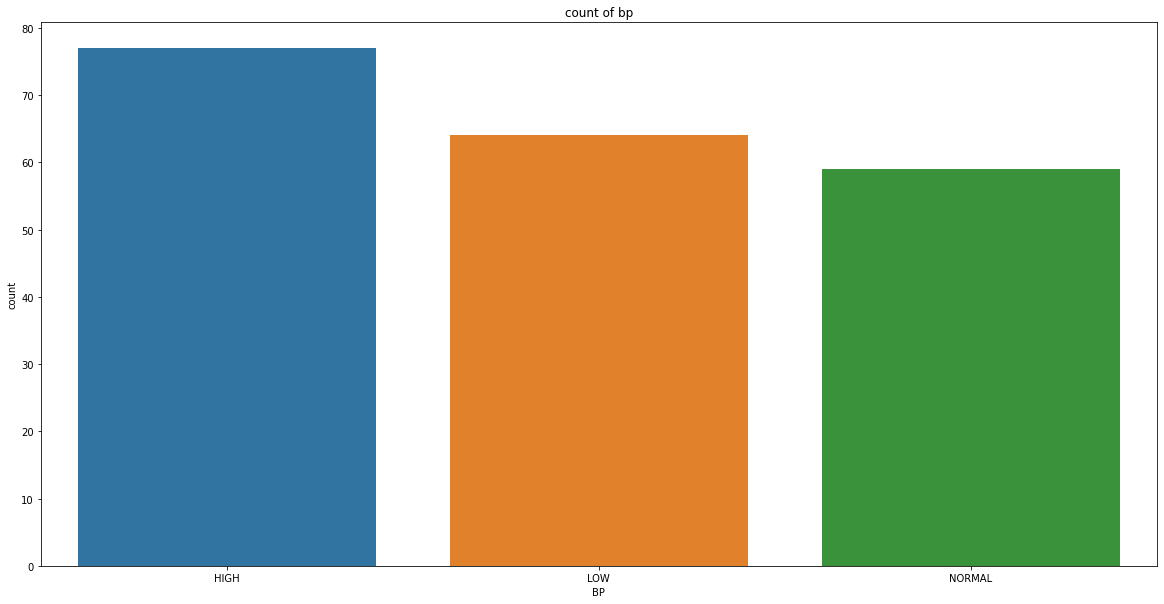

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x=d['BP'])
plt.title('count of bp')

* 40% high bp
* 32% low bp
* 28% of normal bp

Text(0.5, 1.0, 'count of cholesterol')

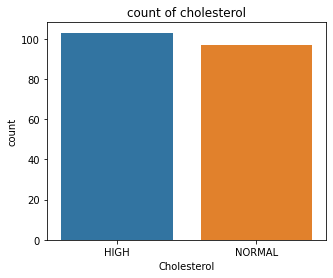

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x=d['Cholesterol'])
plt.title('count of cholesterol')

* 52% of people have high cholestrol
* 48% Of people have normal cholesterol

<AxesSubplot:>

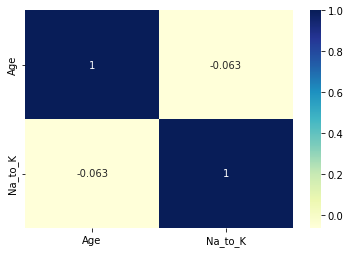

In [24]:
sns.heatmap(d.corr(), cmap="YlGnBu", annot=True)

* no corellation is found(very slight negative correlation)

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


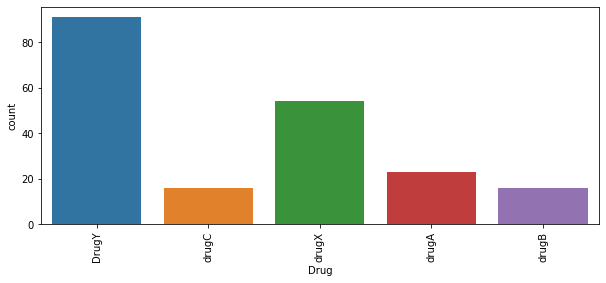

In [25]:
print(d['Drug'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x=d['Drug'])
plt.xticks(rotation=90)
plt.show()

* many people have taken Drug Y approx(47%)


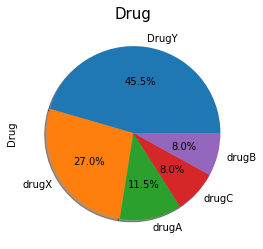

In [26]:
plt.title('Drug',fontsize=15)
d['Drug'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Text(0.5, 1.0, 'Age density and hist plot')

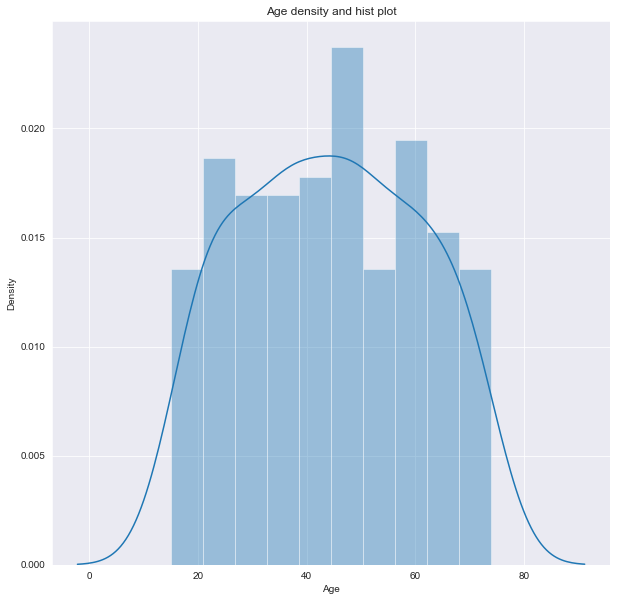

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10)) 
sns.distplot(x=d['Age'],bins=10)
plt.xlabel('Age')
plt.title('Age density and hist plot')

* In the given dataset there are more people in the age group of(45-50) Range.nearly 14%

* In the Second place(55-60)naerly 11%

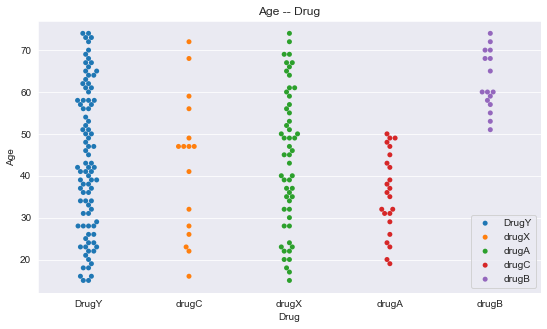

In [28]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = d)
plt.legend(d.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

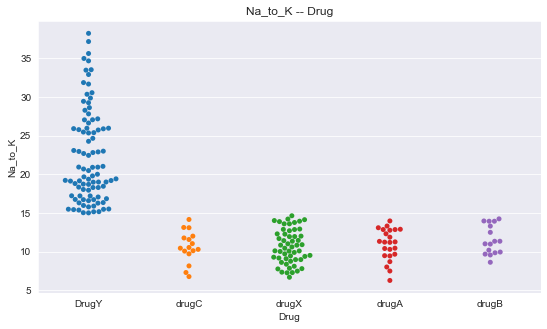

In [29]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = d)
plt.title("Na_to_K -- Drug")
plt.show()

* DrugC,Drugx,drugA and DrugB are only for people whose Na_to_k ratio <15.

* Drug Y only can be taken by the people whose Na_to_k was >15
* Drug C only can be taken by the people whose Na_to_k was<15 
* low BP Drug A only can be taken by the people whose Na_to_k was<15 and high BPDrug B only can be taken by the people whose Na_to_k was<15 and high BP

## Observation
This EDA will give some use useful insights to built a suitable model for drug prediction using age ,bp,cholestrol,na_to_k ratio.

### Preparing to build a model
- Multiple variables which are independent features to predict a dependent variable
- Classify the data by replace method 

#### Feature Transforamtion

In [30]:
d['Sex']=d['Sex'].replace({'F':0,'M':1})

In [31]:
d['BP']=d['BP'].replace({'HIGH':2,'NORMAL':1,'LOW':0})

In [32]:
d['Cholesterol']=d['Cholesterol'].replace({'HIGH':1,'NORMAL':0})

In [33]:
d['Drug']=d['Drug'].replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4})

In [34]:
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [35]:
d.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

#### Model Creation
- Splitting the dataset:
- test_size = 0.25 so that data is split into 75% and 25%
- random_state is applied so that each time we run we get the same result
- Target is drugs
- Features (Age,Sex,BP,Cholesterol,Na_to_K Drug).

In [48]:
x=d.drop('Drug',axis=1)
y=d.Drug

In [49]:
from sklearn.model_selection import train_test_split

In [167]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [168]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 5)
(50, 5)
(150,)
(50,)


#### Training the data with Some of the ML approaches:


- Random Forest Classifier
- KNN
- Decision Tree Classifier
- xgBoost Classifier

#### ML approach Functions
- Model fitting
- Predicting using test
- Accuracy score
- confusion matrix
- Classification report


#### Random Forest:
- Random forests is a supervised learning algorithm. It can be used both for classification and regression.
- It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
model=RandomForestClassifier()

In [171]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [172]:
model.score(x_test,y_test)

1.0

In [173]:
model.score(x_train,y_train)

1.0

In [174]:
y_predict=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


1.0

In [175]:
from sklearn.metrics import confusion_matrix


In [176]:
performance=confusion_matrix(y_test,y_predict)
performance

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 20]], dtype=int64)

In [177]:
from sklearn.metrics import plot_confusion_matrix

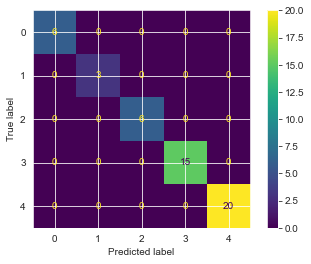

In [178]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [179]:
from sklearn.metrics import classification_report

In [180]:
performance_report = classification_report(y_test,y_predict)
print(performance_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### K-Nearest Neighbors
The K-Nearest Neighbors or KNN Classification is a simple and easy to implement, supervised machine learning algorithm that is used mostly for classification problems but applicable for regression problems too.

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [182]:
knn.score(x_test,y_test)

0.7

In [183]:
knn.score(x_train,y_train)

0.7333333333333333

In [184]:
y_predictknn=knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictknn)



0.7

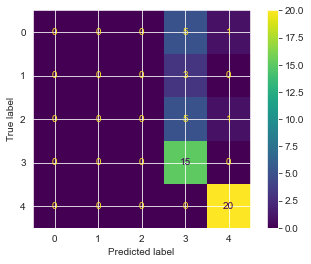

In [185]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_sv,x_test,y_test)
plt.show()

In [186]:
from sklearn.metrics import classification_report
performance_report = classification_report(y_test,y_predictknn)
print(performance_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.20      0.33      0.25         3
           2       0.50      0.17      0.25         6
           3       0.52      0.73      0.61        15
           4       1.00      0.95      0.97        20

    accuracy                           0.70        50
   macro avg       0.64      0.54      0.55        50
weighted avg       0.75      0.70      0.70        50



##### DecisionTreeClassifier


- Decision tree is a type of supervised learning algorithm that can be used for both regression and classification problems. The algorithm uses training data to create rules that can be represented by a tree structure. Like any other tree representation, it has a root node, internal nodes, and leaf nodes.

In [187]:
from sklearn.tree import DecisionTreeClassifier
modeldc=DecisionTreeClassifier()
modeldc.fit(x_train,y_train)

DecisionTreeClassifier()

In [188]:
modeldc.score(x_test,y_test)

1.0

In [189]:
modeldc.score(x_train,y_train)

1.0

In [190]:
y_predictdc=knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictdc)



0.7

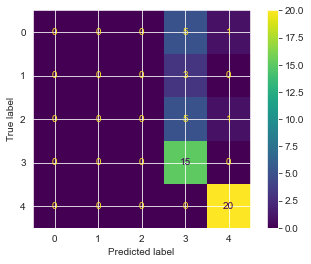

In [191]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_sv,x_test,y_test)
plt.show()

In [192]:
from sklearn.metrics import classification_report
performance_report = classification_report(y_test,y_predict)
print(performance_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [193]:
import xgboost as xgb

In [194]:
model_xgb=xgb.XGBClassifier()

In [195]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [196]:
model_xgb.score(x_test,y_test)

0.98

In [197]:
y_predictxgb=model_xgb.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictknn)



0.7

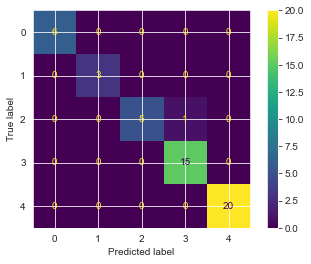

In [198]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_xgb,x_test,y_test)
plt.show()

In [199]:
from sklearn.metrics import classification_report
performance_report = classification_report(y_test,y_predictxgb)
print(performance_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        20

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



### conclusion

##### Random forest, decision tree and xgboost are  best among  the models with an accuracy score of 1.0